In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('../data/star_classification_10_cartesian.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,x,y
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,0.713781,GALAXY,0.042002,-0.654218,0.250033
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,-0.775960,QSO,1.633797,0.348727,0.525619
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,-0.845505,GALAXY,0.454852,0.450750,0.286260
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,0.356499,QSO,2.608515,-0.618062,0.700648
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,-0.969780,GALAXY,0.083804,0.122096,-0.211234


In [34]:
alpha = df['alpha']
delta = df['delta']
redshift = df['redshift']
x = df['x']
y = df['y']
z = df['z']

light_cols = ['u', 'g', 'r', 'i', 'redshift']
colors = ['inferno', 'inferno', 'inferno', 'inferno', 'inferno']

In [35]:
def plot_doido(criterion : pd.Series, color : str = 'hot'):
    # Plot em 3D com cores baseadas no redshift
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=criterion, cmap=color, marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Conversão de Coordenadas Esféricas para Coordenadas Cartesianas com Cor Baseada em {criterion.name}')
    fig.colorbar(sc, label=criterion.name)
    plt.show()

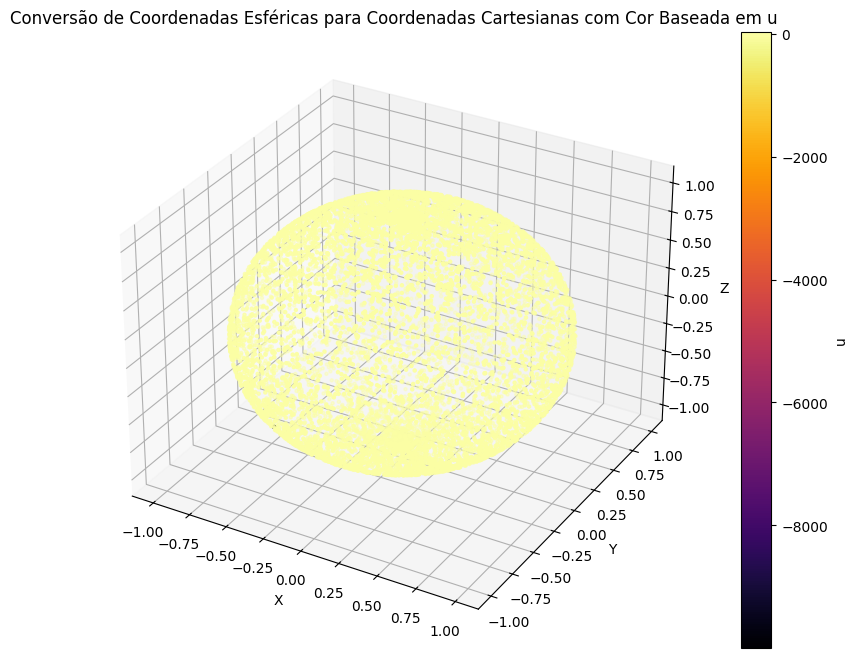

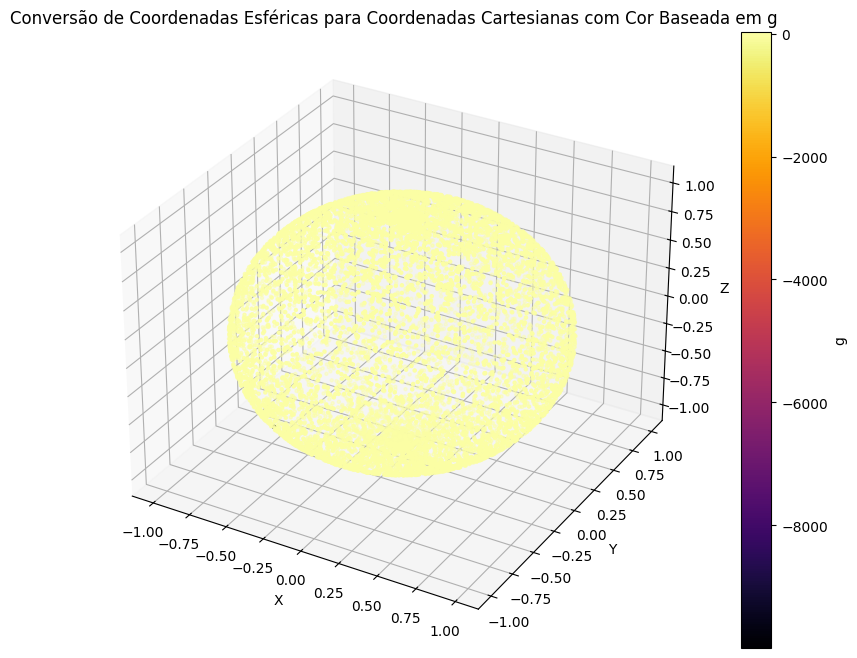

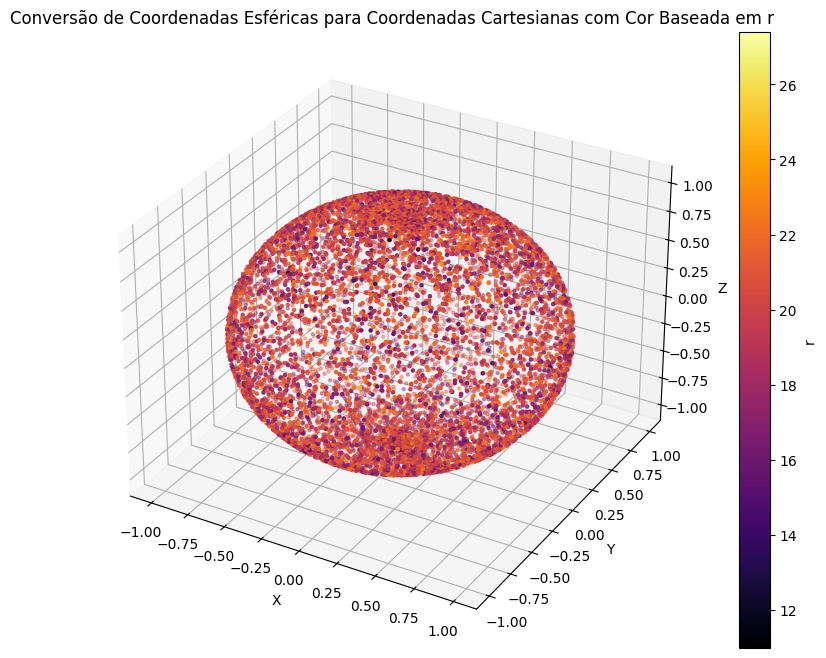

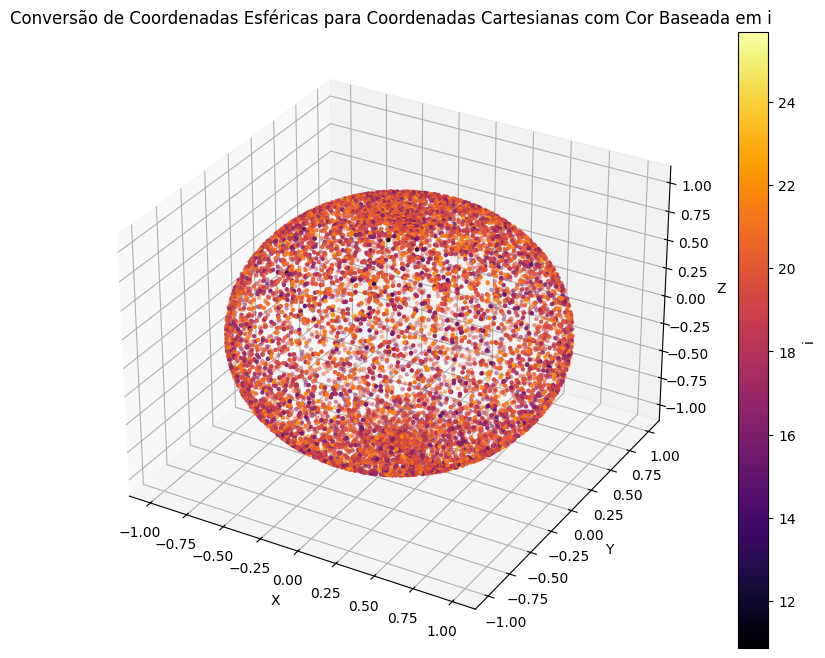

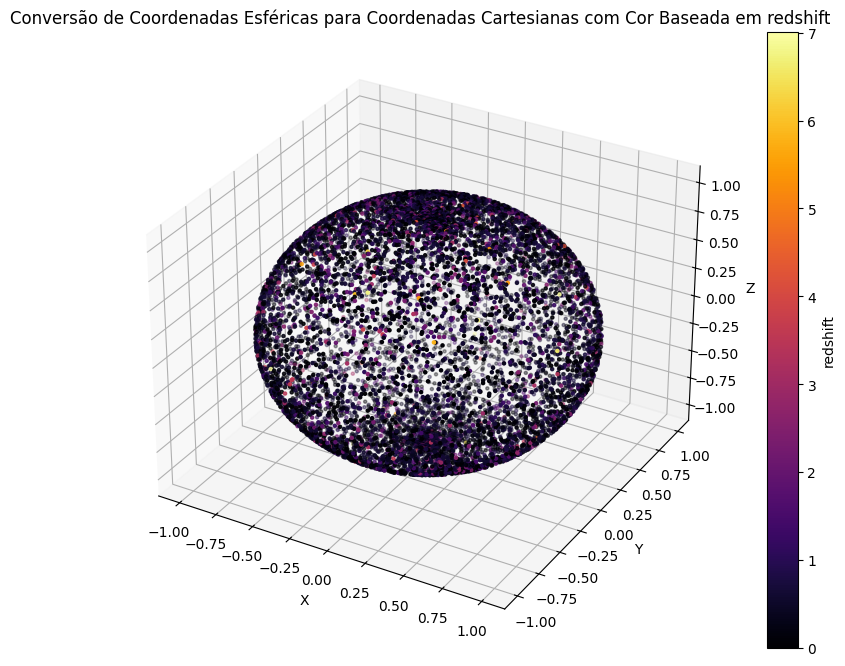

In [36]:
for c1, c2 in zip(light_cols, colors):
    plot_doido(df[c1], c2)

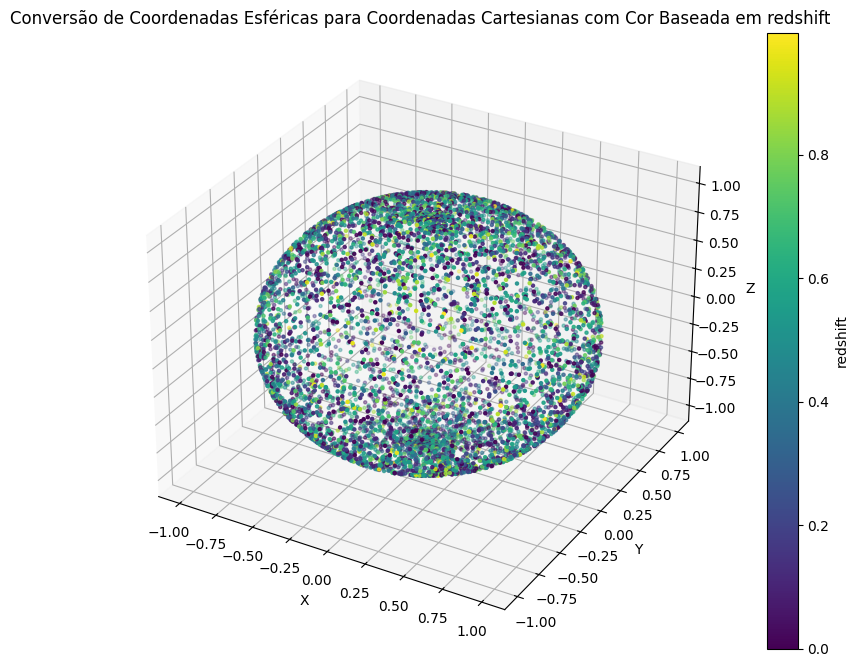

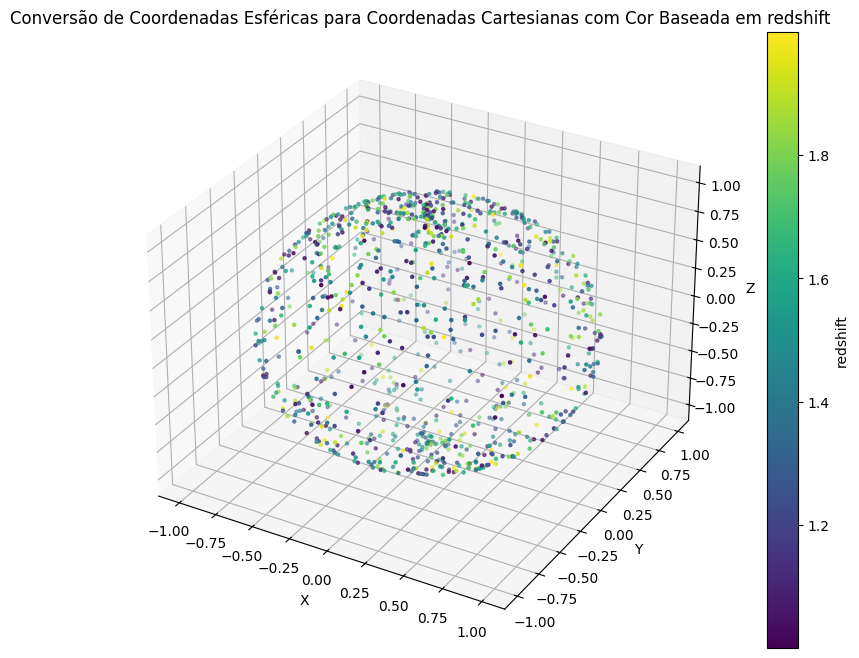

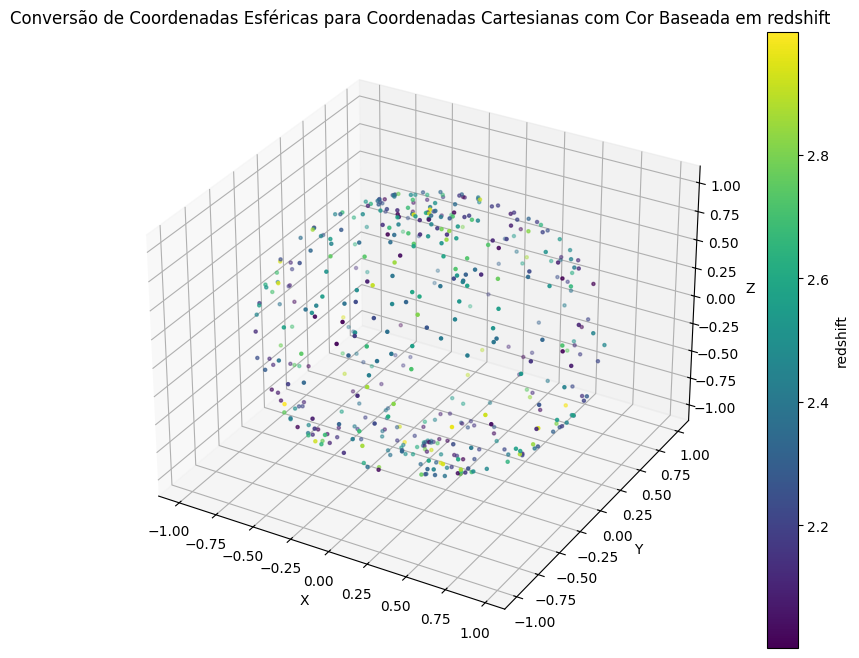

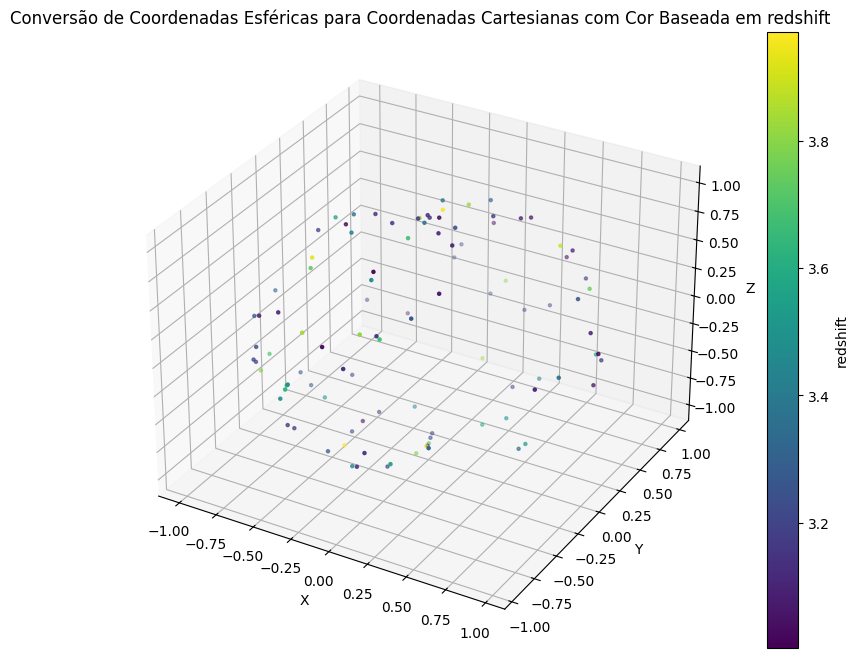

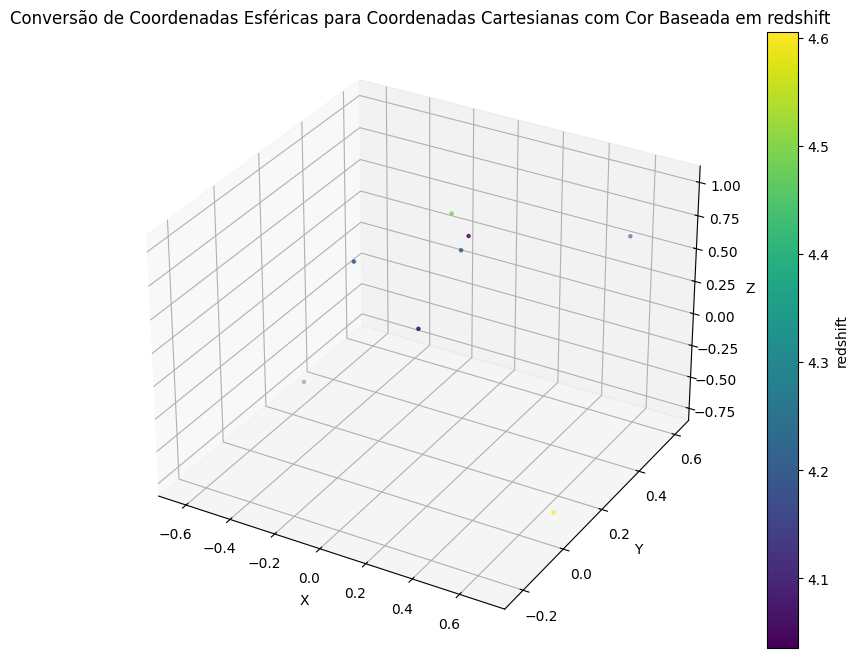

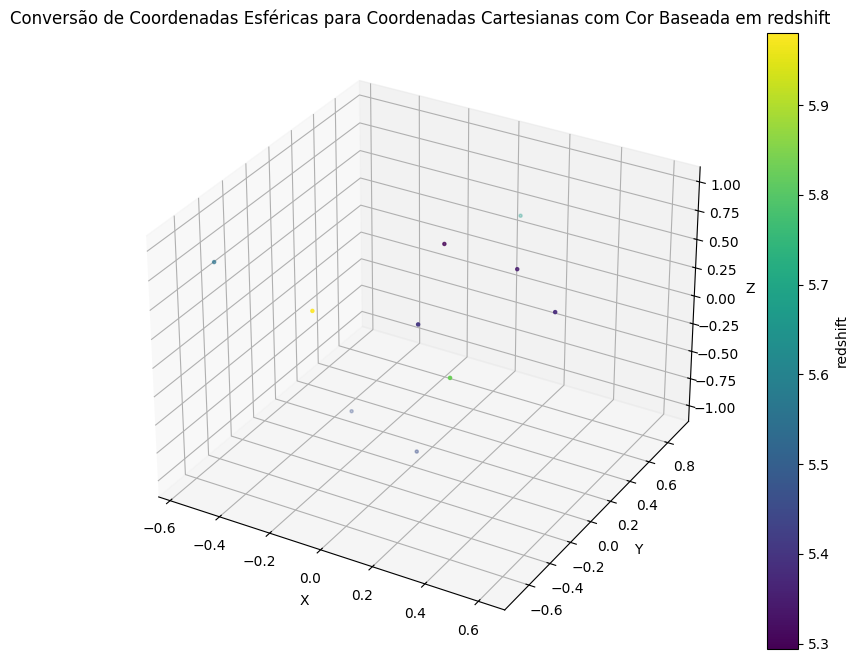

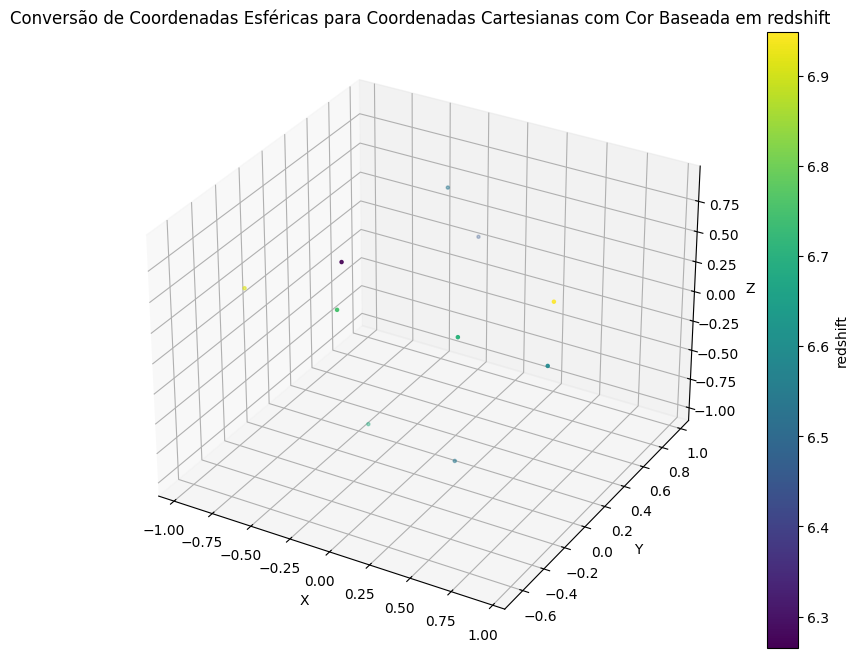

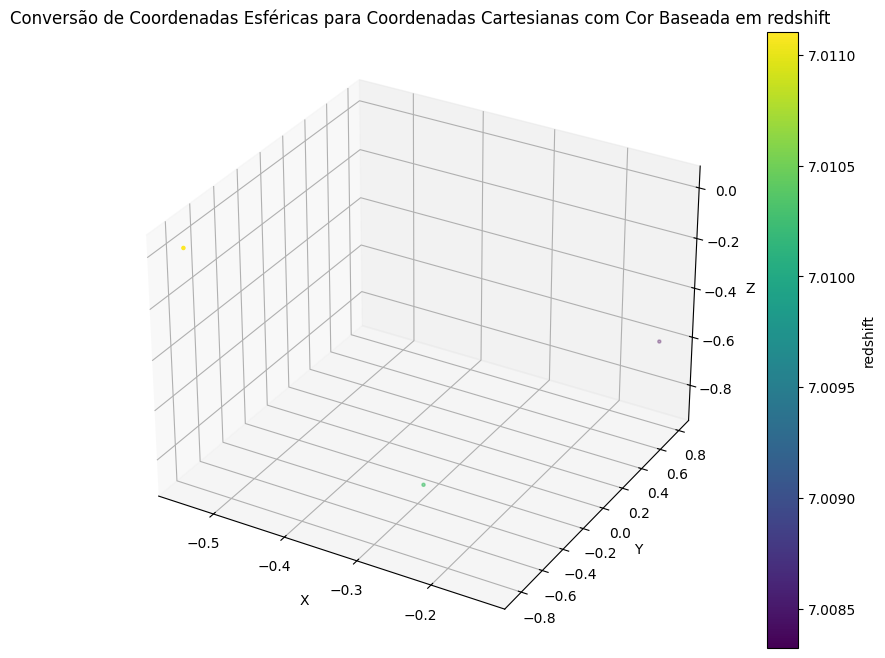

In [47]:
for i in range(8):
    df_redshift = df.copy()
    df_redshift = df_redshift[(df_redshift['redshift'] >= i) & (df_redshift['redshift'] < i + 1)]
    x = df_redshift['x']
    y = df_redshift['y']
    z = df_redshift['z']
    plot_doido(df_redshift['redshift'], None)

In [38]:
df_redshift.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,x,y
count,8.607000e+03,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000,8.607000e+03,8607.000000,8607.000000
mean,1.237665e+18,176.418880,23.340825,21.083753,19.660551,19.778081,19.183065,-0.009407,6.705467e-01,0.003467,-0.001139
std,8.447287e+12,95.315000,19.308092,108.039987,108.020645,1.812783,1.727497,0.710982,7.454807e-01,0.494606,0.499884
min,1.237646e+18,0.011684,-16.450911,-9999.000000,-9999.000000,10.982550,10.873740,-1.000000,7.833687e-08,-0.999690,-0.999760
25%,1.237659e+18,128.436247,4.537413,20.556620,19.349180,18.454520,17.989895,-0.730193,1.510450e-01,-0.360378,-0.362615
50%,1.237664e+18,177.813834,22.178157,22.350770,21.314380,20.254130,19.489360,-0.004273,5.055887e-01,0.004478,-0.001101
75%,1.237668e+18,230.714190,38.975254,23.799375,22.222335,21.120225,20.466460,0.713285,7.892514e-01,0.355790,0.348968
max,1.237681e+18,359.978910,68.987893,29.325650,27.894820,27.397090,25.673360,1.000000,7.011103e+00,0.999311,0.999865
